# [Python Reference Link](http://www.data8.org/sp20/python-reference.html)
*Run the cell below so that we can set our modules up*

In [1]:
import numpy as np
from datascience import *

In [2]:
# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## From the [Demo Request](https://forms.gle/aPK6vTf3FdQwmMVG8): 
### [Homework04](https://skyline.cloudbank.2i2c.cloud/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fb00chan%2Fmath211_fall23_skyline&urlpath=tree%2Fmath211_fall23_skyline%2Fhw%2Fhw04%2Fhw04.ipynb&branch=main) (Section 2, Question 5)

In [3]:
#Setting up and importing data
full_sf = Table.read_table("sf2019.csv")
sf = full_sf.select("Job", "Department", "Organization Group",  "Total Compensation")

**Question 5.** Find the number of departments appearing in the `sf` table that have an average total compensation of greater than 125,000 dollars; assign this value to the variable `num_over_125k`. **(9 Points)**

*Hint:* The variable names provided are meant to help guide the intermediate steps and general thought process. Feel free to delete them if you'd prefer to start from scratch, but make sure your final answer is assigned to `num_over_125k`!

In [4]:
sf

Job,Department,Organization Group,Total Compensation
IS Trainer-Journey,Adult Probation,Public Protection,131391
IS Engineer-Assistant,Adult Probation,Public Protection,172520
IS Business Analyst-Senior,Adult Probation,Public Protection,162468
IS Business Analyst-Principal,Adult Probation,Public Protection,216706
IS Programmer Analyst,Adult Probation,Public Protection,98706
IS Project Director,Adult Probation,Public Protection,236572
IT Operations Support Admin IV,Adult Probation,Public Protection,173269
Accountant III,Adult Probation,Public Protection,158135
Statistician,Adult Probation,Public Protection,126624
Senior Administrative Analyst,Adult Probation,Public Protection,163843


### Let's do a parallel question! On our [Math 211 Class Survey](https://forms.gle/5JXfmkKf5ALgwh3M9)!

#### **"Parallel" Question: How many different fears do introverts have?** 

Find the number of different fears appearing in the `math211_survey` table that have an average introversion/extroversion score of at most 3 (i.e. self-reported introverts); assign this value to the variable `num_introvert_fears`. **(9 Billion Points)**


In [5]:
# Let's import the Math 211 Class Survey
math211_survey = Table.read_table('Math211_FallSurvey.csv')
math211_survey

Timestamp,Surveyor,GPA,introversion/extroversion,Pets,Handed,Sleep Position,K-Pop,K-Pop Group,travel destination,Birthplace,Transfer destination,Fear,Music Genre,Color
8/17/2023 16:33,Christian Le,2.86,6,Dogs,Right-handed,On my side,Yes,Le Sserafim,Japan,Local,UC,Working,Pop,Red
8/17/2023 16:34,Christian Le,4,8,nan,Right-handed,On my back,Yes,Le Sserafim,Switzerland,Local,UC,A regretful life,All,Black
8/17/2023 16:38,Christian Le,2.5,8,Cats,Right-handed,On my stomach,Yes,Seventeen,Hawaii,Local,UC Transfer,"Death, Spiders","R&B, K-POP",Green
8/17/2023 16:38,Christian Le,3.96,6,Cats,Right-handed,On my side,Yes,STAYC,Costa Rica,Local,UC Grad,Loss of loved ones,"R&B, K-POP",Purple
8/17/2023 16:54,Christian Le,2.98,6,nan,Left-handed,On my side,Yes,New Jeans,Hawaii,Local,nan,Death,R&B,Green
8/17/2023 16:55,Christian Le,3.8,8,Dogs,Right-handed,On my side,Yes,New Jeans,Hawaii,Local,UC,Being alone,R&B,Blue
8/17/2023 17:00,Christian Le,4,3,nan,Right-handed,On my back,No,nan,Japan,California (not Bay Area),CSU,Not being accepted into career program,Hip hop,Khaki
8/17/2023 18:13,Christian Le,4,2,"Cats, Dogs, Reptiles",Both,On my stomach,Yes,New Jeans,Dubai,Local,UC,Insects,Pop,Red
8/17/2023 20:38,Casey So,3.86,3,Dogs,Right-handed,On my back,Yes,Seventeen,Korea,Local,UC,Birds,Pop,Light Blue
8/17/2023 20:43,Casey So,3.2,4,nan,Right-handed,On my side,Yes,Twice,Philippines,Local,UC,Death,Pop,Blue


In [6]:
(math211_survey.group('Fear',np.average)
                 .where('introversion/extroversion average',are.below_or_equal_to(3))).num_rows

21

In [7]:
(math211_survey.group('Fear',np.average)
                 .select(0,4)
                 .sort('introversion/extroversion average')
                 .where('introversion/extroversion average',are.below_or_equal_to(3))).show()

Fear,introversion/extroversion average
Killer Clown,1
Lost my phone,1
You,1
Being forgotten,2
Chickens,2
Failing,2
"Future, Stage Fright",2
Insects,2
Socializing,2
Spider,2


# Using Pivot Tables to Analyze Credit/Debit Card Statements

Importing the csv file and storing it in the `spending` table

In [8]:
spending = Table.read_table('2023-10-05_transaction_download.csv')

In [ ]:
#Take a look at all of your expenses
spending.show()

Now, let's reformat our transaction dates so that it only reports the month and year. We aim to examine how our spending habits change month-to-month. 

In [9]:
#Trying out ways to extract the date string if the month is the first number and the year is the last number 

date_string = '10-01-2022'

date_string[0:2]+'-'+date_string[6:10]

'10-2022'

In [10]:
#This cell is devoted to trying out string indexes to identify the month and year in the date 'string'
spending.column('Transaction Date').item(258)[0:7]

'2022-10'

In [11]:
#creating a function to automate the process above
def extract_month_year(date):
    ...
    return date[0:7]

Let's use the function we just created to add a new column to our `spending` table. 

In [12]:
#creates the array of outputs from our transaction month/year function
transaction_month = spending.apply(extract_month_year,'Transaction Date') 

#Now we add that array to the spending table
spending = spending.with_column( 'Trans. Mo/Yr' , transaction_month)
spending

Transaction Date,Posted Date,Card No.,Description,Category,Debit,Credit,Trans. Mo/Yr
2022-12-29,2022-12-30,7100,DOORDASH DASHPASS,Dining,9.99,nan,2022-12
2022-12-29,2022-12-29,7100,CAPITAL ONE MOBILE PYMT,Payment/Credit,nan,4551.43,2022-12
2022-12-27,2022-12-29,7100,HOMEROOM,Dining,54.86,nan,2022-12
2022-12-28,2022-12-29,7100,CHEVRON 0203186,Gas/Automotive,40.49,nan,2022-12
2022-12-28,2022-12-29,7100,SUPER TACOS,Dining,35,nan,2022-12
2022-12-27,2022-12-29,7100,STARBUCKS STORE 08676,Dining,4.25,nan,2022-12
2022-12-27,2022-12-28,7100,OAKLAND PARK METER IPS,Other Services,2.25,nan,2022-12
2022-12-28,2022-12-28,7100,APPLE.COM/BILL,Internet,0.99,nan,2022-12
2022-12-28,2022-12-28,7100,APPLE.COM/BILL,Internet,14.99,nan,2022-12
2022-12-26,2022-12-27,7100,CHEVRON 0203186,Gas/Automotive,13.68,nan,2022-12


In [13]:
#Time to pivot!
spending.pivot('Trans. Mo/Yr','Category','Debit',sum).drop(1).show()

Category,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
Airfare,92.96,378.5,0,0,0,0,0,43.98,0,0,0,162.96
Dining,nan,1788.52,nan,1139.2,1333.11,2573.59,2386.9,1931.08,1707.13,2493.05,3525.21,3469.5
Entertainment,0,0,38.72,0,0,0,0,0,0,0,0,0
Gas/Automotive,173.94,167.62,169.62,298.2,263.09,457.99,345.75,302.39,397.87,235.35,219.92,409.75
Health Care,0,0,0,0,0,0,0,0,106.01,0,0,200
Insurance,251.51,273.41,249.75,249.75,249.75,249.75,249.75,249.75,249.75,289.41,289.42,289.42
Internet,15.98,15.98,35.97,15.98,15.98,0.99,15.98,15.98,15.98,15.98,15.98,15.98
Lodging,0,0,0,0,0,0,0,299.73,0,0,0,0
Merchandise,473.87,436.03,770.08,283.09,329.14,348.02,nan,503.8,444.47,960.31,662.56,398.07
Other,365,0,0,0,0,0,0,0,0,162,0,0


In [14]:
spending.where('Category','Dining').where('Trans. Mo/Yr','2022-12').sort('Debit',descending=True).show()

Transaction Date,Posted Date,Card No.,Description,Category,Debit,Credit,Trans. Mo/Yr
2022-12-15,2022-12-17,7100,MOKUTANYA,Dining,613.77,nan,2022-12
2022-12-07,2022-12-09,7100,WANG DAE BAK,Dining,500,nan,2022-12
2022-12-20,2022-12-22,7100,IZAKAYA GINJI RESTAURA,Dining,425,nan,2022-12
2022-12-01,2022-12-03,7100,IZAKAYA GINJI RESTAURA,Dining,287.9,nan,2022-12
2022-12-21,2022-12-22,7100,IZUMI SUSHI,Dining,270,nan,2022-12
2022-12-11,2022-12-12,7100,SUPER HOT HOTPOT & KOR,Dining,200.08,nan,2022-12
2022-12-13,2022-12-14,7100,GYU KAKU RESTAURANT,Dining,200,nan,2022-12
2022-12-01,2022-12-02,7100,WANG DAE BAK,Dining,199.33,nan,2022-12
2022-12-14,2022-12-16,7100,WANG DAE BAK,Dining,140,nan,2022-12
2022-12-09,2022-12-10,7100,MAJIKKU RAMEN,Dining,130,nan,2022-12


In [15]:
def extract_day_of_month(date):
    return date[8:]
#creates the array of outputs from our transaction month/year function
transaction_day = spending.apply(extract_day_of_month,'Transaction Date') 

#Now we add that array to the spending table
spending = spending.with_column( 'Trans. Day' , transaction_day)
spending

Transaction Date,Posted Date,Card No.,Description,Category,Debit,Credit,Trans. Mo/Yr,Trans. Day
2022-12-29,2022-12-30,7100,DOORDASH DASHPASS,Dining,9.99,nan,2022-12,29
2022-12-29,2022-12-29,7100,CAPITAL ONE MOBILE PYMT,Payment/Credit,nan,4551.43,2022-12,29
2022-12-27,2022-12-29,7100,HOMEROOM,Dining,54.86,nan,2022-12,27
2022-12-28,2022-12-29,7100,CHEVRON 0203186,Gas/Automotive,40.49,nan,2022-12,28
2022-12-28,2022-12-29,7100,SUPER TACOS,Dining,35,nan,2022-12,28
2022-12-27,2022-12-29,7100,STARBUCKS STORE 08676,Dining,4.25,nan,2022-12,27
2022-12-27,2022-12-28,7100,OAKLAND PARK METER IPS,Other Services,2.25,nan,2022-12,27
2022-12-28,2022-12-28,7100,APPLE.COM/BILL,Internet,0.99,nan,2022-12,28
2022-12-28,2022-12-28,7100,APPLE.COM/BILL,Internet,14.99,nan,2022-12,28
2022-12-26,2022-12-27,7100,CHEVRON 0203186,Gas/Automotive,13.68,nan,2022-12,26


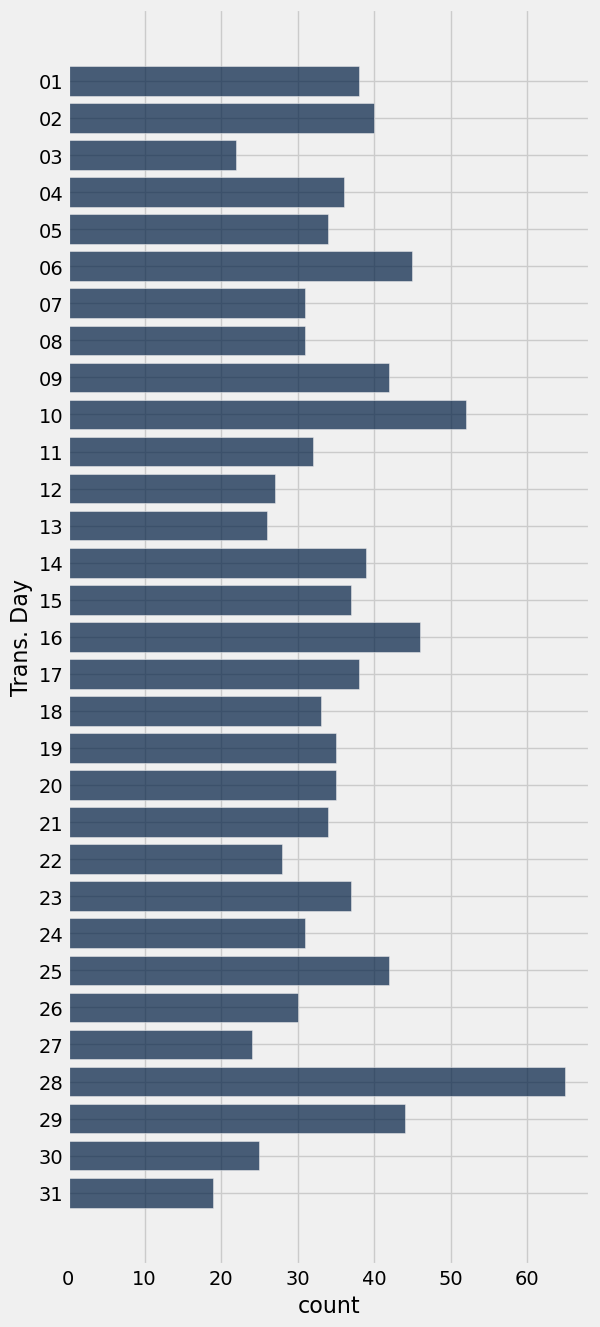

In [16]:
spending.group('Trans. Day').barh('Trans. Day')

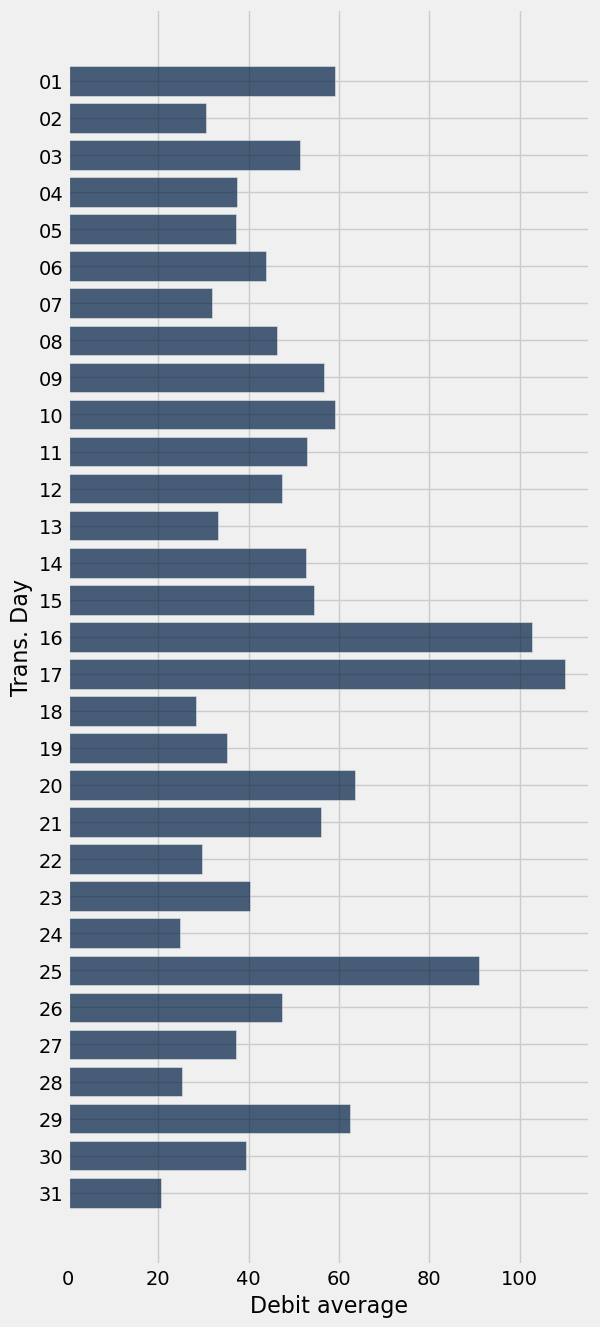

In [17]:
spending.where('Debit',are.above(0)).group('Trans. Day',np.average).select(0,'Debit average').barh('Trans. Day')

In [18]:
spending.where('Trans. Day',"25").show()

Transaction Date,Posted Date,Card No.,Description,Category,Debit,Credit,Trans. Mo/Yr,Trans. Day
2022-10-25,2022-10-26,7100,MAJIKKU RAMEN,Dining,50,nan,2022-10,25
2022-10-25,2022-10-26,7100,AMZN MKTP US*H83TL6XB2,Merchandise,10.9,nan,2022-10,25
2022-10-25,2022-10-26,7100,SMCCD CSM BOOKSTORE,Merchandise,3.5,nan,2022-10,25
2022-10-25,2022-10-26,7100,REDWOOD SKYLINE,Dining,8.99,nan,2022-10,25
2022-09-25,2022-09-27,7100,TACO BELL 30796,Dining,10.47,nan,2022-09,25
2022-09-25,2022-09-26,7100,CVS/PHARMACY #09216,Health Care,53.01,nan,2022-09,25
2022-09-25,2022-09-26,7100,IZUMI SUSHI,Dining,125,nan,2022-09,25
2022-09-25,2022-09-26,7100,CHEVRON 0097927,Gas/Automotive,28.01,nan,2022-09,25
2022-09-25,2022-09-26,7100,APPLE.COM/BILL,Internet,14.99,nan,2022-09,25
2022-08-25,2022-08-26,7100,LA CASA MIA,Dining,110,nan,2022-08,25
